In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.feature_selection import RFE
%matplotlib inline

from sklearn import datasets ## import datasets from sklearn
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import tree
%matplotlib inline

def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)

    return acc, precision, recall, f1score

def display_metrics(classifierName,Y_pred,Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("______________________________________________")
    print ("")




/Users/aruba/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
shot_data = pd.read_csv('shot_logs(original).csv') 

In [3]:
shot_data.describe()

,HOME,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIS,CLOSE_DEF_DIST,PTS_TYPE,FGM,...,FG%_off,3P_off,3PA_off,3P%_off,2P_off,2PA_off,2P%_off,eFG%_off,TOV_off,PTS_off
count,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,...,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000,127951.000000
mean,0.499183,6.506413,2.458183,11.912120,2.023064,2.813715,4.136945,1.233369,2.264711,0.452118,...,0.452925,69.145806,193.483326,0.302449,269.003978,550.710960,0.484473,0.500888,119.046932,909.693406
std,0.500001,4.713549,1.118357,6.182201,3.477011,2.958166,2.709563,0.756166,0.441181,0.497704,...,0.052005,58.438293,151.242932,0.127089,138.464722,273.687713,0.046802,0.043347,60.136079,398.527995
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.000000,0.000000,...,0.325000,0.000000,0.000000,0.000000,5.000000,16.000000,0.307000,0.393000,11.000000,80.000000
25%,0.000000,3.000000,1.000000,7.500000,0.000000,0.900000,1.430000,0.700000,2.000000,0.000000,...,0.422000,12.000000,42.000000,0.287000,168.000000,346.000000,0.457000,0.474000,79.000000,605.000000
50%,0.000000,5.000000,2.000000,12.000000,1.000000,1.600000,4.180000,1.130000,2.000000,0.000000,...,0.446000,65.000000,192.000000,0.342000,250.000000,512.000000,0.481000,0.500000,107.000000,884.000000
75%,1.000000,9.000000,3.000000,16.400000,2.000000,3.700000,6.860000,1.580000,3.000000,1.000000,...,0.479000,106.000000,288.000000,0.371000,364.000000,736.000000,0.511000,0.520000,149.000000,1154.000000
max,1.000000,38.000000,4.000000,24.000000,32.000000,24.900000,14.390000,5.000000,3.000000,1.000000,...,0.710000,286.000000,646.000000,1.000000,641.000000,1310.000000,0.713000,0.711000,321.000000,2217.000000


In [4]:
shot_data.DRIBBLES.astype('int64')

0         1
1         1
2         9
3         1
4         2
         ..
127946    5
127947    2
127948    0
127949    2
127950    0
Name: DRIBBLES, Length: 127951, dtype: int64

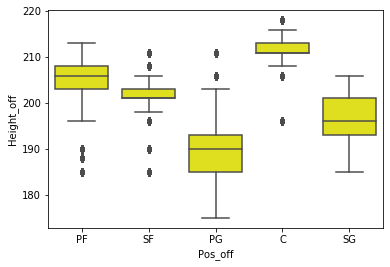

In [5]:
sns.boxplot(x='Pos_off',y='Height_off',data=shot_data,color='Yellow')

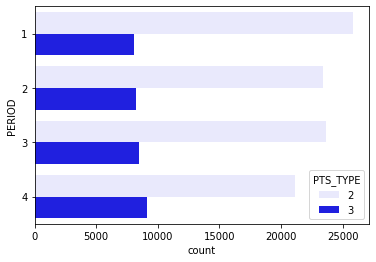

In [6]:
sns.countplot(y='PERIOD',hue="PTS_TYPE",data=shot_data,color='Blue')

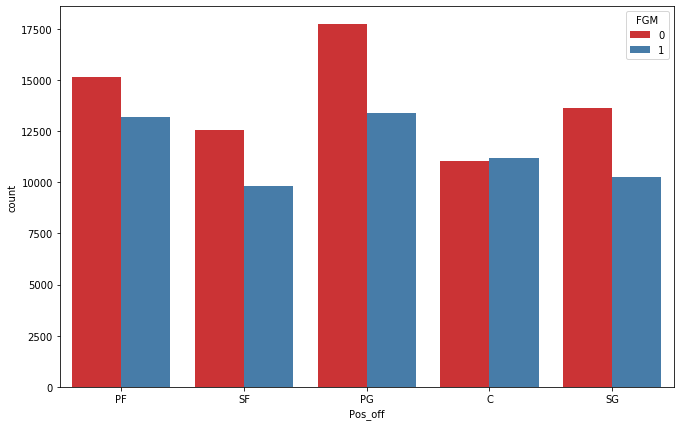

In [7]:
plt.figure(figsize=(11,7))
sns.countplot(x='Pos_off', hue='FGM', data=shot_data, palette='Set1')

/Users/aruba/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


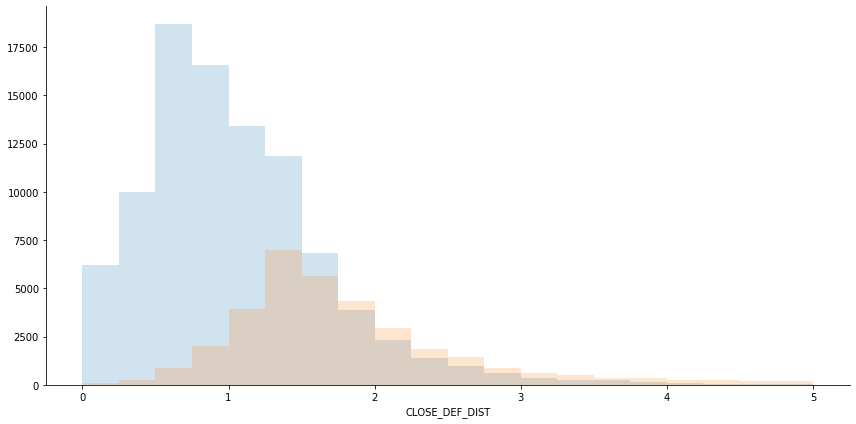

In [8]:
g = sns.FacetGrid(shot_data,hue='PTS_TYPE',size=6,aspect=2)
g = g.map(plt.hist,'CLOSE_DEF_DIST',bins=20,alpha=0.2)

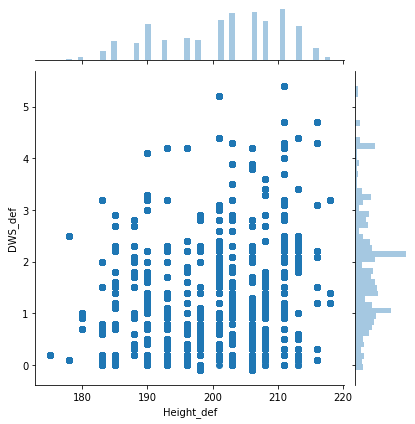

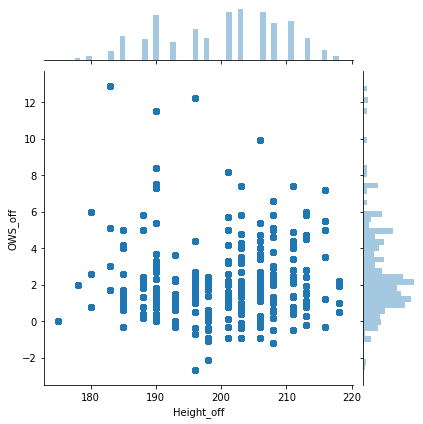

In [9]:
sns.jointplot(x='Height_def',y='DWS_def',data=shot_data,kind='scatter')
sns.jointplot(x='Height_off',y='OWS_off',data=shot_data,kind='scatter')

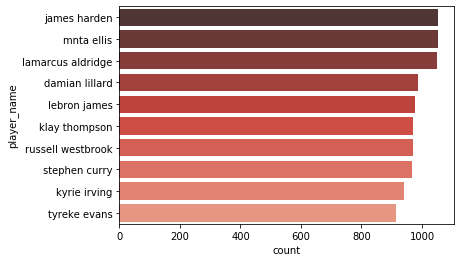

In [10]:
sns.countplot(y="player_name", data=shot_data, palette="Reds_d",
              order=shot_data.player_name.value_counts().iloc[:10].index)

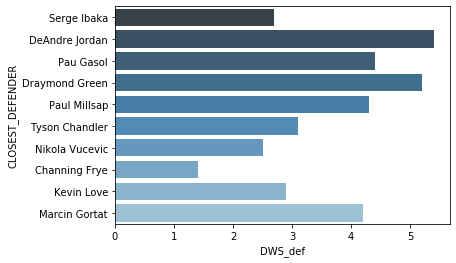

In [11]:
sns.barplot(x="DWS_def",y="CLOSEST_DEFENDER", data=shot_data, palette="Blues_d",
              order=shot_data.CLOSEST_DEFENDER.value_counts().iloc[:10].index)

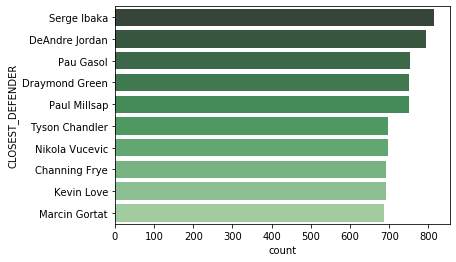

In [12]:
sns.countplot(y="CLOSEST_DEFENDER", data=shot_data, palette="Greens_d",
              order=shot_data.CLOSEST_DEFENDER.value_counts().iloc[:10].index)

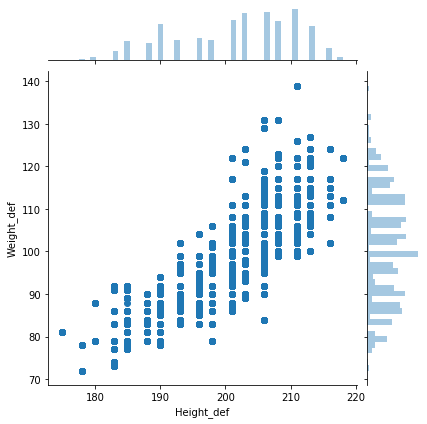

In [13]:
sns.jointplot(x='Height_def',y='Weight_def',data=shot_data,kind='scatter')

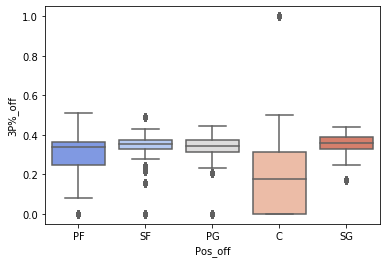

In [14]:
sns.boxplot(x="Pos_off", y="3P%_off", data=shot_data, palette='coolwarm') 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


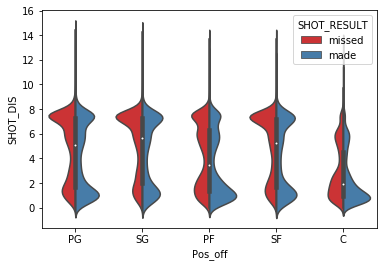

In [47]:
# Distribution of total bills aggregated and by sex 
sns.violinplot(x="Pos_off", y="SHOT_DIS", data=shot_data,hue='SHOT_RESULT',split=True,palette='Set1')


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


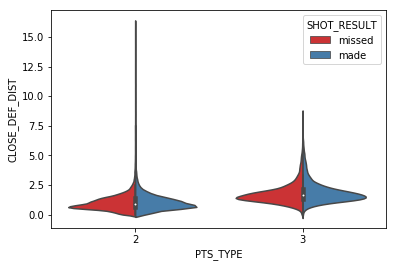

In [54]:
sns.violinplot(x="PTS_TYPE", y="CLOSE_DEF_DIST", data=shot_data,hue='SHOT_RESULT',split=True,palette='Set1')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


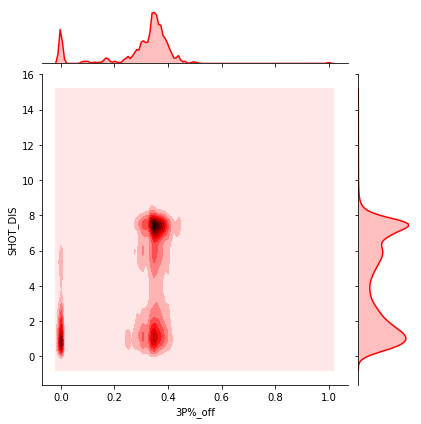

In [17]:
sns.jointplot(x='3P%_off',y='SHOT_DIS',data=shot_data,color='red',kind='kde');

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


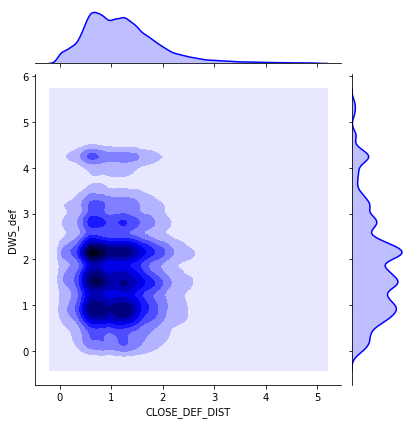

In [15]:
sns.jointplot(x='CLOSE_DEF_DIST',y='DWS_def',data=shot_data,color='blue',kind='kde')

In [ ]:
sns.jointplot(x='CLOSE_DEF_DIST',y='DWS_def',data=shot_data,color='blue',kind='kde')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


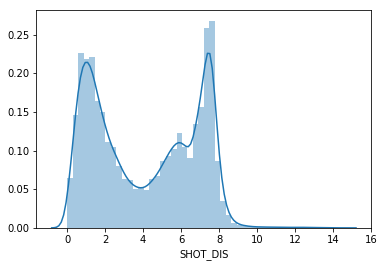

In [55]:
sns.distplot(shot_data['SHOT_DIS'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


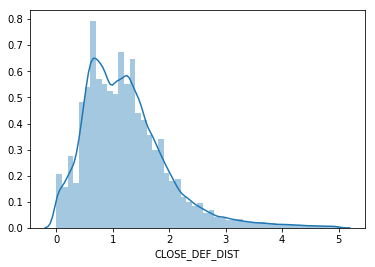

In [16]:
sns.distplot(shot_data['CLOSE_DEF_DIST'])

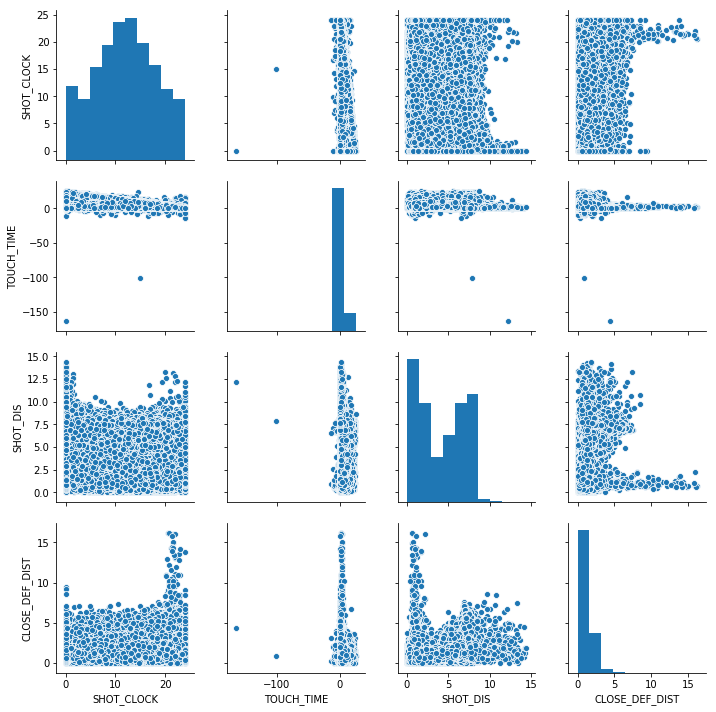

In [56]:
sns.pairplot(shot_data[['SHOT_CLOCK','TOUCH_TIME','SHOT_DIS','CLOSE_DEF_DIST','SHOT_RESULT']])

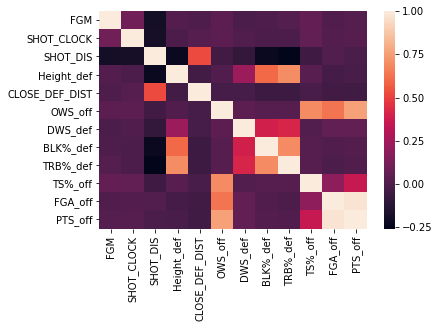

In [102]:
sns.heatmap(shot_data[['FGM','SHOT_CLOCK','SHOT_DIS','Height_def','CLOSE_DEF_DIST','OWS_off','DWS_def','BLK%_def','TRB%_def','TS%_off','FGA_off','PTS_off']].corr())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


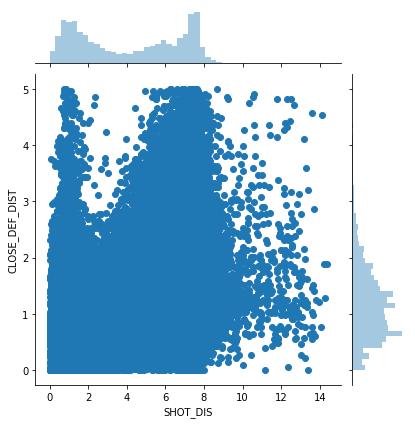

In [41]:
sns.jointplot(x='SHOT_DIS',y='CLOSE_DEF_DIST',data=shot_data,kind='scatter')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


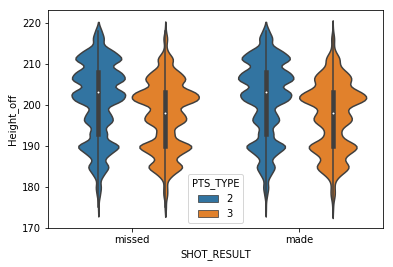

In [46]:
sns.violinplot(x='SHOT_RESULT',y='Height_off',hue = 'PTS_TYPE',data=shot_data,kind='scatter')

In [6]:
shot_data2 = shot_data

predictors1 = ['HOME']+['PERIOD']+['DRIBBLES']+['SHOT_DIS']+['TOUCH_TIME']+['SHOT_CLOCK']+ ['CLOSE_DEF_DIST']+[ 'Height_def']+['Age_def']+['DWS_def']+['BLK%_def']+['TRB%_def']+['STL%_def']+['USG%_def']+['TOV%_def']+['Height_off']+['Age_off']+['OWS_off']+['OBPM_off']+['FG%_off']+['USG%_off']+['TOV%_off']

X = shot_data2[predictors1]

#X = sm.add_constant(X)
y = shot_data2['FGM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.657360
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    FGM   No. Observations:                89565
Model:                          Logit   Df Residuals:                    89543
Method:                           MLE   Df Model:                           21
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                 0.04512
Time:                        22:22:32   Log-Likelihood:                -58876.
converged:                       True   LL-Null:                       -61658.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
HOME               0.0235      0.014      1.694      0.090      -0.004       0.051
PERIOD            -0.0049      0.006     -0.791      0.429      -0.017       0.007
DRIBBLES           0.0350      0.006      6.095      0.000       0.024       0.046
SHOT_DIS          -0.2152      0.004    -59.570      0.000      -0.222      -0.208
TOUCH_TIME        -0.0732      0.007    -10.860      0.000      -0.086      -0.060
SHOT_CLOCK         0.0137      0.001     11.666      0.000       0.011       0.016
CLOSE_DEF_DIST     0.3943      0.012     33.425      0.000       0.371       0.417
Height_def        -0.0017      0.001     -2.193      0.028      -0.003      -0.000
Age_def           -0.0014      0.002     -0.897      0.369      -0.004       0.002
DWS_def           -0.0231      0.008     -2.994      0.003      -0.038      -0.008
BLK%_def          -0.0540      0.006     -8.387      0.000      -0.067      -0.041
TRB%_def          -0.0047      0.002     -2.021      0.043      -0.009      -0.000
STL%_def          -0.0003      0.013     -0.025      0.980      -0.026       0.025
USG%_def           0.0001      0.001      0.098      0.922      -0.003       0.003
TOV%_def          -0.0008      0.002     -0.413      0.680      -0.005       0.003
Height_off        -0.0005      0.001     -0.567      0.571      -0.002       0.001
Age_off            0.0069      0.002      4.399      0.000       0.004       0.010
OWS_off           -0.0016      0.006     -0.249      0.803      -0.014       0.011
OBPM_off           0.0257      0.007      3.623      0.000       0.012       0.040
FG%_off            1.4247      0.193      7.364      0.000       1.046       1.804
USG%_off           0.0038      0.002      2.303      0.021       0.001       0.007
TOV%_off          -0.0073      0.002     -3.365      0.001      -0.012      -0.003
==================================================================================
"""

In [8]:
rfe = RFE(model,22)
rfe = rfe.fit(X_train,y_train.ravel())
print(rfe.support_)
print(rfe.ranking_) 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[15552  5416]
 [ 9421  7997]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.613478872505601
Precision: 0.5962126295385074
Recall: 0.45912274658399355
F1-score: 0.5187635821089164
______________________________________________



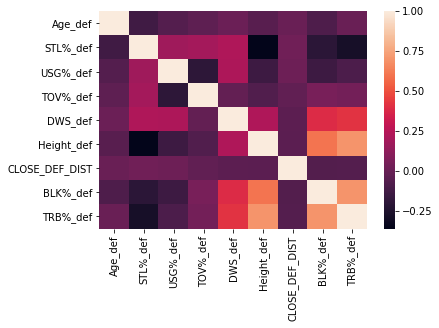

In [18]:
sns.heatmap(shot_data2[['Age_def','STL%_def','USG%_def','TOV%_def','DWS_def','Height_def','CLOSE_DEF_DIST','BLK%_def','TRB%_def']].corr())

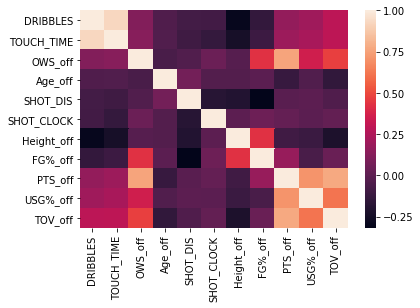

In [114]:
sns.heatmap(shot_data[['DRIBBLES']+['TOUCH_TIME']+['OWS_off']+['Age_off']+['SHOT_DIS']+['SHOT_CLOCK']+['Height_off']+['FG%_off']+['PTS_off']+['USG%_off']+['TOV_off']].corr())

In [9]:
predictors3 = ['DRIBBLES']+['SHOT_DIS']+['SHOT_CLOCK']+ ['CLOSE_DEF_DIST']+[ 'Height_def']+['BLK%_def']+['Age_off']+['OBPM_off']+['FG%_off']


X = shot_data2[predictors3]

#X = sm.add_constant(X)
y = shot_data2['FGM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.658244
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    FGM   No. Observations:                89565
Model:                          Logit   Df Residuals:                    89556
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                 0.04383
Time:                        22:22:52   Log-Likelihood:                -58956.
converged:                       True   LL-Null:                       -61658.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
DRIBBLES          -0.0236      0.002    -10.920      0.000      -0.028      -0.019
SHOT_DIS          -0.2139      0.004    -60.595      0.000      -0.221      -0.207
SHOT_CLOCK         0.0154      0.001     13.336      0.000       0.013       0.018
CLOSE_DEF_DIST     0.3985      0.012     34.047      0.000       0.376       0.421
Height_def        -0.0029      0.000     -7.184      0.000      -0.004      -0.002
BLK%_def          -0.0667      0.005    -14.004      0.000      -0.076      -0.057
Age_off            0.0069      0.002      4.447      0.000       0.004       0.010
OBPM_off           0.0303      0.003      9.850      0.000       0.024       0.036
FG%_off            1.2046      0.141      8.522      0.000       0.928       1.482
==================================================================================
"""

In [10]:
X_new = pd.DataFrame({'DRRIBBLE': [2], 'SHOT_DIS': [4.14],'SHOT_CLOCK': [11],'CLOSE_DEF_DIST': [1.23],'Height_def':[201],'BLK%_def': [2],'Age_off': [28],'OBPM_off': [0.6],'FG_%off': [0.453]})

In [13]:
proba = model.predict_proba(X_new)[:,1]

In [14]:
proba

array([0.44083775])

In [12]:
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[15556  5412]
 [ 9419  7999]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.6136351794925233
Precision: 0.5964506748191782
Recall: 0.45923757032954415
F1-score: 0.5189269843329333
______________________________________________



In [61]:
#Random Forest and Desision Tree

In [15]:
P2 = ['HOME']+['DRIBBLES']+['SHOT_DIS']+['TOUCH_TIME']+['SHOT_CLOCK']+ ['CLOSE_DEF_DIST']+[ 'Height_def']+['Age_def']+['BLK%_def']+['TRB%_def']+['Age_off']+['OBPM_off']+['FG%_off']+['TOV%_off']

X = shot_data[P2]
y = shot_data['FGM'] #define the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Decision Tree', y_pred, y_test)




confusion matrix: 
 [[12087  8892]
 [ 8768  8639]]
______________________________________________
Model: Decision Tree
Accuracy: 0.5399364351586516
Precision: 0.49278421082653584
Recall: 0.4962945941287988
F1-score: 0.4945331730494018
______________________________________________



[Text(0,0,'SHOT_DIS'),
 Text(0,0,'SHOT_CLOCK'),
 Text(0,0,'CLOSE_DEF_DIST'),
 Text(0,0,'TOUCH_TIME'),
 Text(0,0,'TRB%_def'),
 Text(0,0,'BLK%_def'),
 Text(0,0,'TOV%_off'),
 Text(0,0,'FG%_off'),
 Text(0,0,'OBPM_off'),
 Text(0,0,'Age_def'),
 Text(0,0,'Height_def'),
 Text(0,0,'Age_off'),
 Text(0,0,'DRIBBLES'),
 Text(0,0,'HOME')]

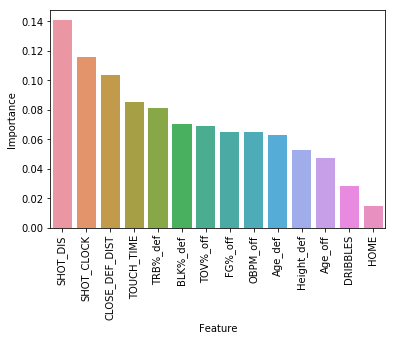

In [16]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':dt.feature_importances_})
importances = importances.sort_values('Importance', ascending=False) 
graph = sns.barplot(x=importances['Feature'], y=importances['Importance'], data=importances)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90) # rotate x-axis labels


In [19]:
rfc = RandomForestClassifier(n_estimators=400) #n_estimators is the number of trees to include in the forest #跑过了100，200，300，400，发现400 accuracy 最大

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_pred = rfc.predict(X_test)
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[16723  4256]
 [10541  6866]]
______________________________________________
Model: Random Forest
Accuracy: 0.6145209190850831
Precision: 0.6173350116885452
Recall: 0.39443901878554605
F1-score: 0.481334782151495
______________________________________________



In [17]:
#New Variable Selection Methods
shot_data = pd.read_csv('shot_logs(original3).csv') 

In [18]:
# Replicate original data so not to overwrite it 
shot_data2 = shot_data 

X = shot_data2.drop(['FGM'],axis=1)

#X = sm.add_constant(X)
y = shot_data2['FGM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.658234
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    FGM   No. Observations:                89565
Model:                          Logit   Df Residuals:                    89546
Method:                           MLE   Df Model:                           18
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                 0.04385
Time:                        22:23:42   Log-Likelihood:                -58955.
converged:                       True   LL-Null:                       -61658.
                                        LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SHOT_NUMBER       -0.0006      0.002     -0.371      0.711      -0.004       0.003
SHOT_CLOCK         0.0153      0.001     13.191      0.000       0.013       0.018
DRIBBLES          -0.0221      0.002     -9.978      0.000      -0.026      -0.018
SHOT_DIS          -0.2174      0.004    -59.952      0.000      -0.225      -0.210
CLOSE_DEF_DIST     0.3997      0.012     33.999      0.000       0.377       0.423
Height_def        -0.0077      0.001    -15.144      0.000      -0.009      -0.007
Age_def        -9.523e-05      0.002     -0.063      0.950      -0.003       0.003
STL%_def           0.0175      0.012      1.418      0.156      -0.007       0.042
TOV%_def          -0.0031      0.002     -1.556      0.120      -0.007       0.001
USG%_def           0.0025      0.001      1.703      0.089      -0.000       0.005
DWS_def           -0.0484      0.008     -6.099      0.000      -0.064      -0.033
PF_def            -0.0001      0.000     -0.774      0.439      -0.000       0.000
Age_off            0.0046      0.002      2.908      0.004       0.002       0.008
TS%_off            2.7533      0.180     15.310      0.000       2.401       3.106
3PAr_off          -0.0501      0.052     -0.971      0.332      -0.151       0.051
FTr_off           -0.3110      0.077     -4.044      0.000      -0.462      -0.160
TOV%_off          -0.0034      0.002     -1.560      0.119      -0.008       0.001
USG%_off           0.0083      0.002      5.380      0.000       0.005       0.011
3P%_off            0.1158      0.070      1.646      0.100      -0.022       0.254
==================================================================================
"""

In [21]:
rfe = RFE(model,19)
rfe = rfe.fit(X_train,y_train.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
model = LogisticRegression()

# Fit the model using training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Logistic Regression', y_pred, y_test)

confusion matrix: 
 [[15477  5491]
 [ 9318  8100]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.6142083051112385
Precision: 0.5959826355676551
Recall: 0.46503616947984844
F1-score: 0.5224289722338675
______________________________________________



In [22]:
#Random Forest and Desision Tree
X = shot_data2.drop(['FGM'],axis=1)

y = shot_data['FGM'] #define the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Decision Tree', y_pred, y_test)


confusion matrix: 
 [[11996  8983]
 [ 8781  8626]]
______________________________________________
Model: Decision Tree
Accuracy: 0.5372271140519981
Precision: 0.48986313816798227
Recall: 0.49554776813925433
F1-score: 0.4926890564313457
______________________________________________



[Text(0,0,'SHOT_DIS'),
 Text(0,0,'SHOT_CLOCK'),
 Text(0,0,'CLOSE_DEF_DIST'),
 Text(0,0,'SHOT_NUMBER'),
 Text(0,0,'USG%_def'),
 Text(0,0,'PF_def'),
 Text(0,0,'TOV%_def'),
 Text(0,0,'DWS_def'),
 Text(0,0,'STL%_def'),
 Text(0,0,'TOV%_off'),
 Text(0,0,'TS%_off'),
 Text(0,0,'USG%_off'),
 Text(0,0,'Age_def'),
 Text(0,0,'FTr_off'),
 Text(0,0,'3PAr_off'),
 Text(0,0,'3P%_off'),
 Text(0,0,'Height_def'),
 Text(0,0,'DRIBBLES'),
 Text(0,0,'Age_off')]

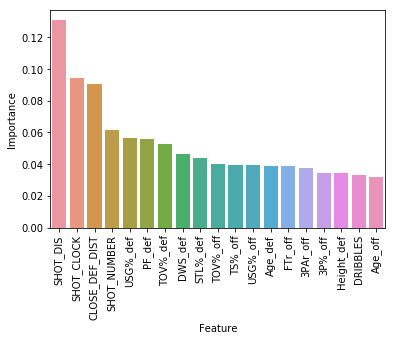

In [23]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':dt.feature_importances_})
importances = importances.sort_values('Importance', ascending=False) 
graph = sns.barplot(x=importances['Feature'], y=importances['Importance'], data=importances)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90) # rotate x-axis labels

In [24]:
rfc = RandomForestClassifier(n_estimators=400) #n_estimators is the number of trees to include in the forest

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
y_pred = rfc.predict(X_test)
# calculate the confusion matrix for the test data 
confusion_matrix_results = confusion_matrix(y_test, y_pred)

# print the counts of the confusion matrix 
print('confusion matrix: \n', confusion_matrix_results)

# print the metrics 
display_metrics('Random Forest', y_pred, y_test)

confusion matrix: 
 [[16207  4772]
 [10277  7130]]
______________________________________________
Model: Random Forest
Accuracy: 0.6079560256343458
Precision: 0.5990589816837506
Recall: 0.40960533118860226
F1-score: 0.48653997065747717
______________________________________________

